In [1]:
import numpy as np
import pandas as pd

In [265]:
######give matrix as an Input######
###### only gives softmax along rows #######
def softmax(x):
    x = x.transpose()
    maxima = np.amax(x,axis=0)
    x = x-maxima
    numerator = np.exp(x)
    return (numerator/numerator.sum(axis=0)).transpose()

In [3]:
######give column vector as an Input######

def softmaxJacobian(x):
    return np.diag(x)-np.outer(x,x)

In [4]:
def createOneHotVectors(x):
    mat = np.zeros((x.shape[0],np.max(np.array(x))+1))
    mat[np.arange(x.shape[0]),x.flatten()] = 1
    return mat

In [5]:
Train_data = np.array(pd.read_csv('mnist/mnist-train-data.csv',sep = " ",header = None))
Train_data = Train_data/255
Train_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-train-labels.csv',sep = " ",header = None)))
Test_data = np.array(pd.read_csv('mnist/mnist-test-data.csv',sep = " ",header = None))
Test_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-test-labels.csv',sep = " ",header = None)))
CV_data = np.array(pd.read_csv('mnist/mnist-valid-data.csv',sep = " ",header = None))
CV_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-valid-labels.csv',sep = " ",header = None)))

In [6]:
############ Don't apply softmax before calculating the loss, it is already embedded in the the method###########

def crossEntropyLoss_stable(Hypothesis,y):
    maxima_for_loss = np.amax(Hypothesis,axis=1)
    Hypothesis1 = (Hypothesis.transpose() - maxima_for_loss).transpose()
    Hypothesis2 = (Hypothesis1.transpose() - np.log(np.exp(Hypothesis1).sum(axis=1))).transpose()
    return -np.sum(np.multiply(y,Hypothesis2))

In [41]:
############ Apply softmax before calculating the loss, it is already embedded in the the method###########


def crossEntropyLoss(Hypothesis,y):
    #print(Hypothesis.shape)
    #print(np.matrix(y).shape)
    #return np.sum(np.log(Hypothesis+1e-10)* (np.matrix(y)), axis=1)
    return - np.sum(np.multiply(np.log(Hypothesis+1e-10) , (y)), axis=1)

In [14]:
######## X should be in a row vector, W should be in column vector, B should be row vector ##########
def fprop(X,W,B):
    return np.matmul(X,W)+B

In [266]:
def gradientCrossEntropy(Hypothesis,y):
    return -y/Hypothesis

In [272]:
initial_bias = np.zeros((1,Train_labels.shape[1]))
variance = np.sqrt(2/(Train_data.shape[1]+Train_labels.shape[1]))
initial_weights = np.random.normal(0,variance,Train_data.shape[1]*Train_labels.shape[1])
initial_weights = initial_weights.reshape(Train_data.shape[1],Train_labels.shape[1])
loss_ = np.zeros(Train_data.shape[0])
cost = np.zeros(10)

In [273]:
cost = np.zeros(10)
for j in range(10):
    print(j)
    for i in range(Train_data.shape[0]):
        Temp = fprop(Train_data[i],initial_weights,initial_bias)
        hypothesis = softmax(Temp)
        #print(hypothesis)
        #gradientLoss = gradientCrossEntropy(hypothesis,Train_labels[i])
        #print(gradientLoss.shape)
        #gradientSoftmax = softmaxJacobian(hypothesis)
        #grandientLoss = np.matmul(gradientLoss,gradientSoftmax)
        Weight_grad = np.matmul(np.matrix(Train_data[i]).transpose(),hypothesis-Train_labels[i])
        initial_weights = initial_weights - 0.001 * Weight_grad
        initial_bias = initial_bias - 0.001 * (hypothesis-Train_labels[i])
        loss_[i] = crossEntropyLoss(hypothesis,Train_labels[i])
        cost[j] = np.mean(loss_)

0
1
2
3
4
5
6
7
8
9


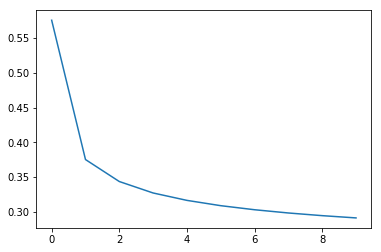

In [274]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.show()

In [275]:
1-(np.count_nonzero(np.argmax(CV_labels,axis=1).reshape(1,10000)  != np.argmax(softmax(np.matmul(CV_data/255,initial_weights)+initial_bias),axis=1).flatten())/10000)


0.923

In [278]:
np.count_nonzero(np.argmax(CV_labels,axis=1).reshape(1,10000)  != np.argmax(softmax(np.matmul(CV_data/255,initial_weights)+initial_bias),axis=1).flatten())

770

In [284]:
a = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
b =  np.matrix([[1000,100,10],[20,100,10],[10,344,1231231]])

crossEntropyLoss(a,softmax(b))

matrix([[-1.00000008e-10],
        [-1.00000008e-10],
        [-1.00000008e-10]])